In [ ]:
!pip uninstall scikit-learn -y

!pip install -U scikit-learn


**Import Modules**

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, AdaBoostRegressor
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error,make_scorer
from sklearn.model_selection import KFold, cross_val_score
from sklearn.preprocessing import MinMaxScaler
import pickle

import datetime as dt
lab = LabelEncoder()

import warnings
warnings.filterwarnings('ignore')


In [3]:
! pip install kaggle

# Import DataSet from Kaggel Directly

In [4]:
!kaggle datasets download -d deepcontractor/car-price-prediction-challenge/
! unzip "car-price-prediction-challenge.zip"

Dataset URL: https://www.kaggle.com/datasets/deepcontractor/car-price-prediction-challenge/versions/
License(s): CC0-1.0
100% 429k/429k [00:00<00:00, 1.11MB/s]
100% 429k/429k [00:00<00:00, 1.10MB/s]
Archive:  car-price-prediction-challenge.zip
replace car_price_prediction.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: A
  inflating: car_price_prediction.csv  


# Reading Dataset

In [5]:
df = pd.read_csv('/content/car_price_prediction.csv')

**Exploring  DataSet**

In [6]:
df.head()

,ID,Price,Levy,Manufacturer,Model,Prod. year,Category,Leather interior,Fuel type,Engine volume,Mileage,Cylinders,Gear box type,Drive wheels,Doors,Wheel,Color,Airbags
0,45654403,13328,1399,LEXUS,RX 450,2010,Jeep,Yes,Hybrid,3.5,186005 km,6.0,Automatic,4x4,04-May,Left wheel,Silver,12
1,44731507,16621,1018,CHEVROLET,Equinox,2011,Jeep,No,Petrol,3,192000 km,6.0,Tiptronic,4x4,04-May,Left wheel,Black,8
2,45774419,8467,-,HONDA,FIT,2006,Hatchback,No,Petrol,1.3,200000 km,4.0,Variator,Front,04-May,Right-hand drive,Black,2
3,45769185,3607,862,FORD,Escape,2011,Jeep,Yes,Hybrid,2.5,168966 km,4.0,Automatic,4x4,04-May,Left wheel,White,0
4,45809263,11726,446,HONDA,FIT,2014,Hatchback,Yes,Petrol,1.3,91901 km,4.0,Automatic,Front,04-May,Left wheel,Silver,4


In [7]:
df.shape

(19237, 18)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19237 entries, 0 to 19236
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   ID                19237 non-null  int64  
 1   Price             19237 non-null  int64  
 2   Levy              19237 non-null  object 
 3   Manufacturer      19237 non-null  object 
 4   Model             19237 non-null  object 
 5   Prod. year        19237 non-null  int64  
 6   Category          19237 non-null  object 
 7   Leather interior  19237 non-null  object 
 8   Fuel type         19237 non-null  object 
 9   Engine volume     19237 non-null  object 
 10  Mileage           19237 non-null  object 
 11  Cylinders         19237 non-null  float64
 12  Gear box type     19237 non-null  object 
 13  Drive wheels      19237 non-null  object 
 14  Doors             19237 non-null  object 
 15  Wheel             19237 non-null  object 
 16  Color             19237 non-null  object

# Data Checks


# check Missing value


In [9]:
df.isnull().sum()

ID                  0
Price               0
Levy                0
Manufacturer        0
Model               0
Prod. year          0
Category            0
Leather interior    0
Fuel type           0
Engine volume       0
Mileage             0
Cylinders           0
Gear box type       0
Drive wheels        0
Doors               0
Wheel               0
Color               0
Airbags             0
dtype: int64

#Check Duplicate Values

In [10]:
df.duplicated().sum()

313

In [11]:
# drop duplicate values
df.drop_duplicates(inplace= True)


# Check Unique Values

In [12]:
df.nunique()

ID                  18924
Price                2315
Levy                  559
Manufacturer           65
Model                1590
Prod. year             54
Category               11
Leather interior        2
Fuel type               7
Engine volume         107
Mileage              7687
Cylinders              13
Gear box type           4
Drive wheels            3
Doors                   3
Wheel                   2
Color                  16
Airbags                17
dtype: int64

# Check statistics of data set

In [13]:
df.describe()


,ID,Price,Prod. year,Cylinders,Airbags
count,1.892400e+04,1.892400e+04,18924.000000,18924.000000,18924.000000
mean,4.557538e+07,1.858744e+04,2010.914236,4.580216,6.568379
std,9.375468e+05,1.921356e+05,5.665749,1.200223,4.322323
min,2.074688e+07,1.000000e+00,1939.000000,1.000000,0.000000
25%,4.569501e+07,5.331000e+03,2009.000000,4.000000,4.000000
50%,4.577191e+07,1.317200e+04,2012.000000,4.000000,6.000000
75%,4.580174e+07,2.206300e+04,2015.000000,4.000000,12.000000
max,4.581665e+07,2.630750e+07,2020.000000,16.000000,16.000000


**Exploring the columns unique values**

In [14]:
for col in df.columns:
    print(f'Category in {col} is :\n {df[col].unique()}\n')
    print('**'*50 )

Category in ID is :
 [45654403 44731507 45774419 ... 45804997 45793526 45813273]

****************************************************************************************************
Category in Price is :
 [13328 16621  8467 ... 56814 63886 22075]

****************************************************************************************************
Category in Levy is :
 ['1399' '1018' '-' '862' '446' '891' '761' '751' '394' '1053' '1055'
 '1079' '810' '2386' '1850' '531' '586' '1249' '2455' '583' '1537' '1288'
 '915' '1750' '707' '1077' '1486' '1091' '650' '382' '1436' '1194' '503'
 '1017' '1104' '639' '629' '919' '781' '530' '640' '765' '777' '779' '934'
 '769' '645' '1185' '1324' '830' '1187' '1111' '760' '642' '1604' '1095'
 '966' '473' '1138' '1811' '988' '917' '1156' '687' '11714' '836' '1347'
 '2866' '1646' '259' '609' '697' '585' '475' '690' '308' '1823' '1361'
 '1273' '924' '584' '2078' '831' '1172' '893' '1872' '1885' '1266' '447'
 '2148' '1730' '730' '289' '502' '333' '1325'

# **Drop Colums which are not need or provide non essential information**

In [15]:
df=df.drop(['ID','Doors'],axis=1)


In [16]:
# Replacing '-' with 0
df['Levy']=df['Levy'].replace('-','0')

# Converting Levy type to float
df['Levy'] = df['Levy'].astype('float64')


**Striping the Km from the milleage because we know the standard unit of measure distance is km in the dataset**

In [17]:
# Replacing 'Km' with ''
df['Mileage'] =df['Mileage'].str.replace('km',"")

# Converting Mileage type to int64
df.Mileage = df.Mileage.astype('Int64')



**Change Engine volume types and standard them in float values**

In [18]:
# Replacing 'Turbo' with ''
df['Engine volume'] = df['Engine volume'].str.replace('Turbo','')

# Converting Levy type to float
df['Engine volume'] = df['Engine volume'].astype('float64')


**We need  to check the age of car so creating the age column**

In [19]:
dtime = dt.datetime.now()
df['Age']=dtime.year - df['Prod. year']
df = df.drop('Prod. year',axis=1)

In [20]:
df.head()

,Price,Levy,Manufacturer,Model,Category,Leather interior,Fuel type,Engine volume,Mileage,Cylinders,Gear box type,Drive wheels,Wheel,Color,Airbags,Age
0,13328,1399.0,LEXUS,RX 450,Jeep,Yes,Hybrid,3.5,186005,6.0,Automatic,4x4,Left wheel,Silver,12,14
1,16621,1018.0,CHEVROLET,Equinox,Jeep,No,Petrol,3.0,192000,6.0,Tiptronic,4x4,Left wheel,Black,8,13
2,8467,0.0,HONDA,FIT,Hatchback,No,Petrol,1.3,200000,4.0,Variator,Front,Right-hand drive,Black,2,18
3,3607,862.0,FORD,Escape,Jeep,Yes,Hybrid,2.5,168966,4.0,Automatic,4x4,Left wheel,White,0,13
4,11726,446.0,HONDA,FIT,Hatchback,Yes,Petrol,1.3,91901,4.0,Automatic,Front,Left wheel,Silver,4,10


In [21]:
df.info()


<class 'pandas.core.frame.DataFrame'>
Index: 18924 entries, 0 to 19236
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Price             18924 non-null  int64  
 1   Levy              18924 non-null  float64
 2   Manufacturer      18924 non-null  object 
 3   Model             18924 non-null  object 
 4   Category          18924 non-null  object 
 5   Leather interior  18924 non-null  object 
 6   Fuel type         18924 non-null  object 
 7   Engine volume     18924 non-null  float64
 8   Mileage           18924 non-null  Int64  
 9   Cylinders         18924 non-null  float64
 10  Gear box type     18924 non-null  object 
 11  Drive wheels      18924 non-null  object 
 12  Wheel             18924 non-null  object 
 13  Color             18924 non-null  object 
 14  Airbags           18924 non-null  int64  
 15  Age               18924 non-null  int64  
dtypes: Int64(1), float64(3), int64(3), object(9)


# Charts

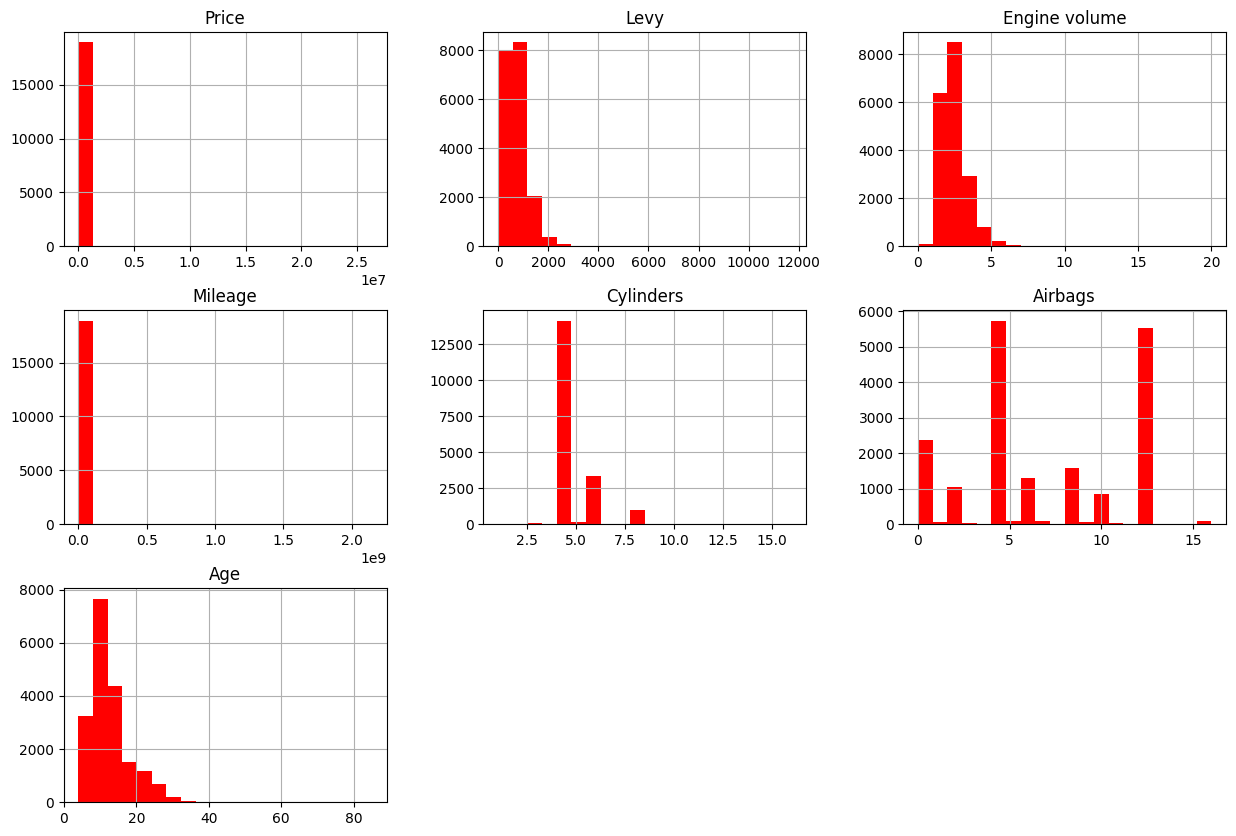

In [22]:
df.hist(bins=20,figsize=(15,10),color='red')
plt.show()


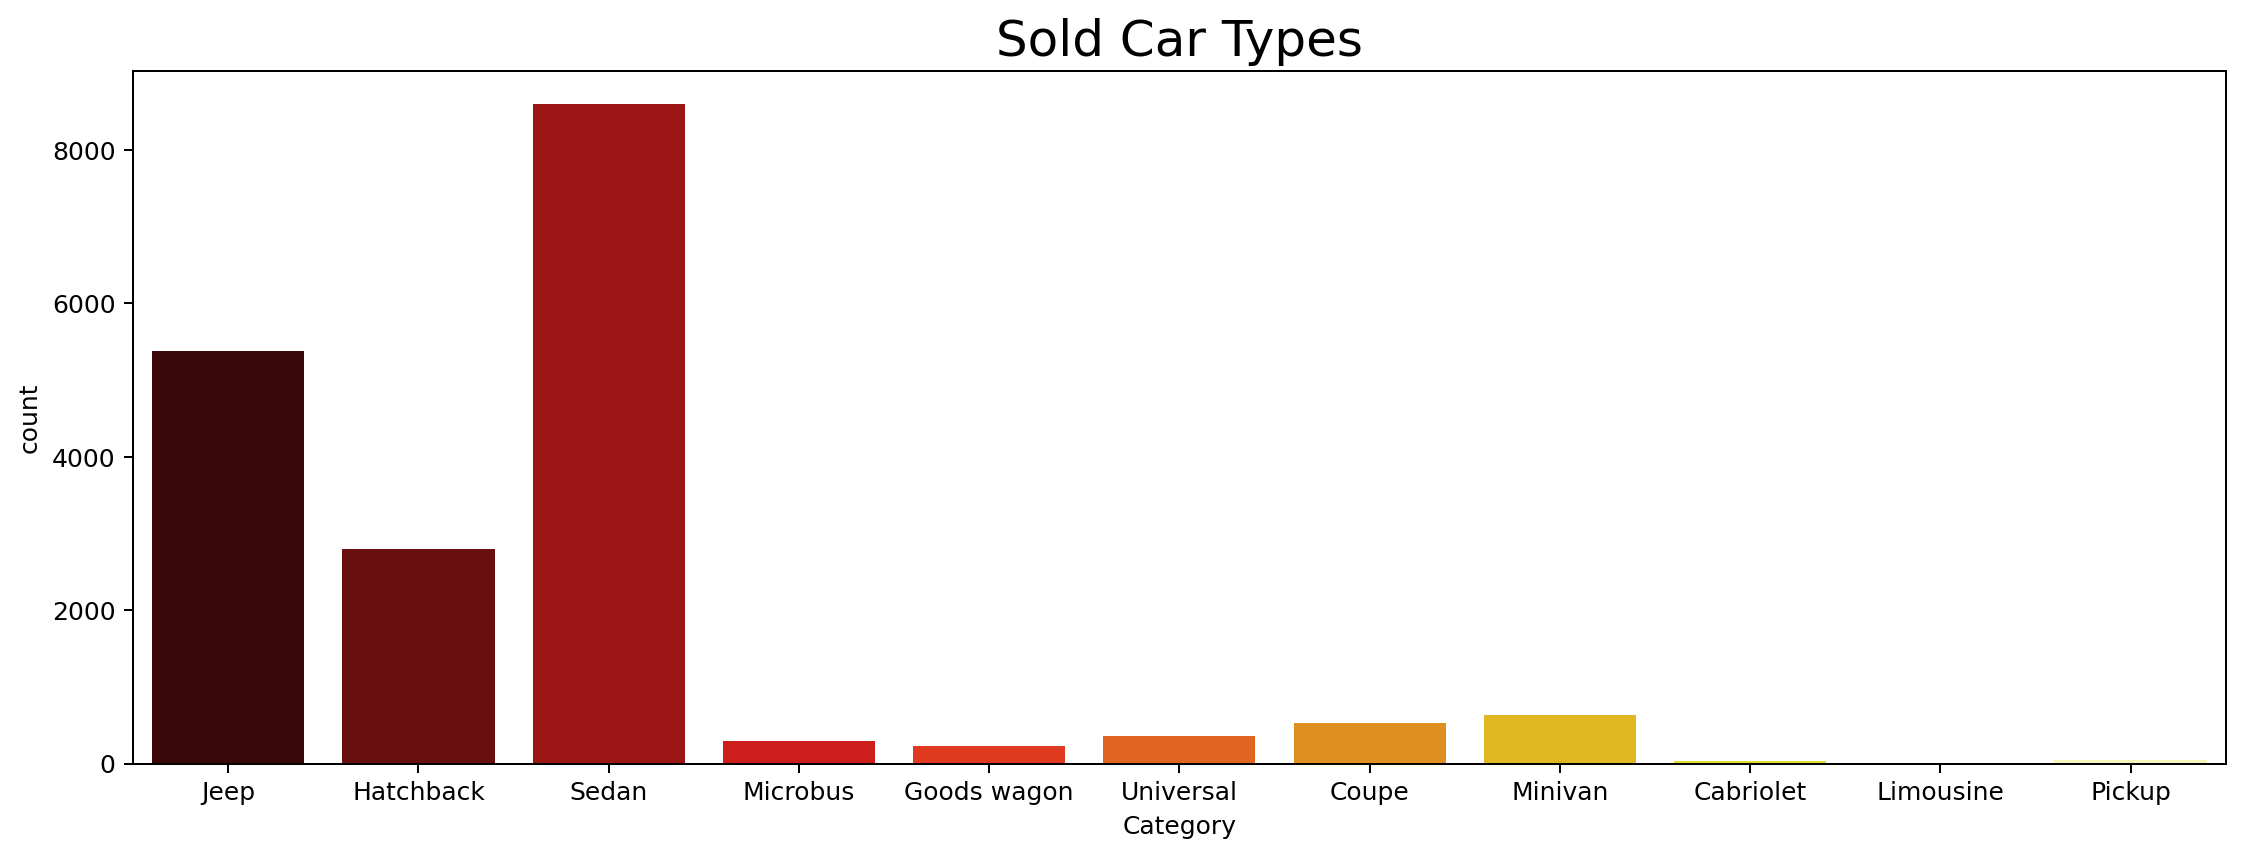

In [23]:
plt.subplots(figsize=(15,5), dpi=180)
sns.countplot(data= df, x='Category',palette='hot')
plt.title("Sold Car Types",fontsize=20)
plt.show()


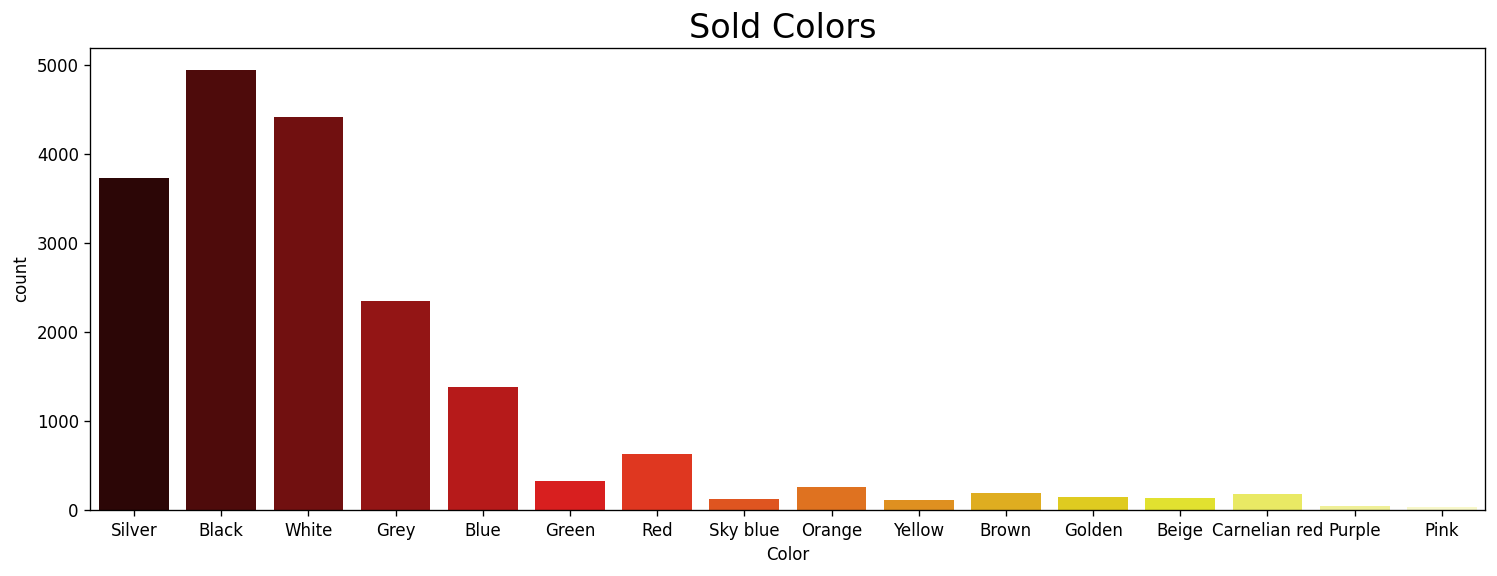

In [24]:
plt.subplots(figsize=(15,5), dpi=120)
sns.countplot(data= df, x='Color',palette='hot')
plt.title("Sold Colors ",fontsize=20)
plt.show()


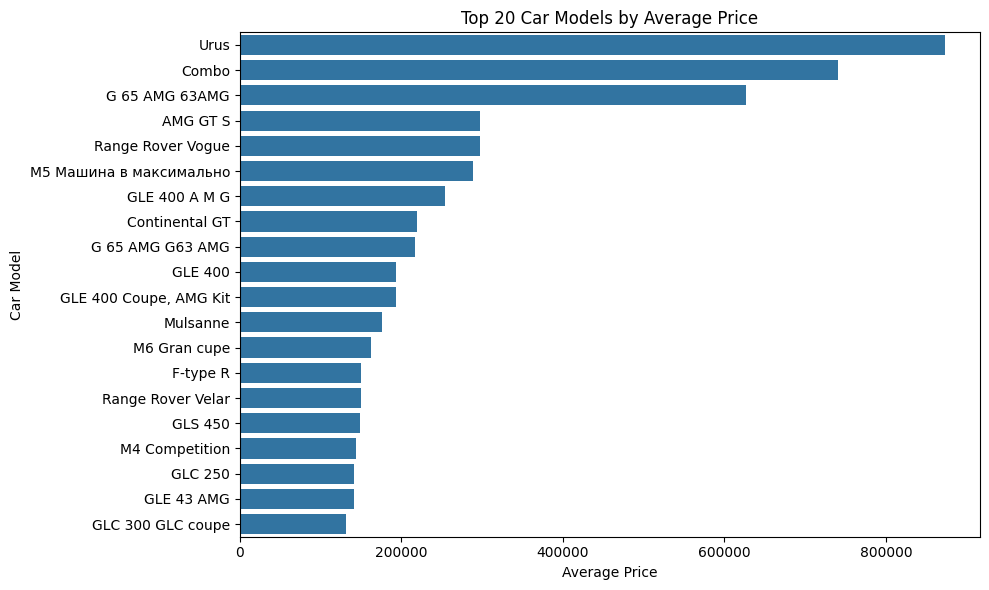

In [25]:
# Calculate average price for each car model
avg_prices_by_car = df.groupby('Model')['Price'].mean().sort_values(ascending=False)

# Plot top N car models by average price
n = 20  # Number of top car models to plot
top_car_models = avg_prices_by_car.head(n)

plt.figure(figsize=(10, 6))
sns.barplot(x=top_car_models.values, y=top_car_models.index)
plt.title(f'Top {n} Car Models by Average Price')
plt.xlabel('Average Price')
plt.ylabel('Car Model')
plt.tight_layout()
plt.show()


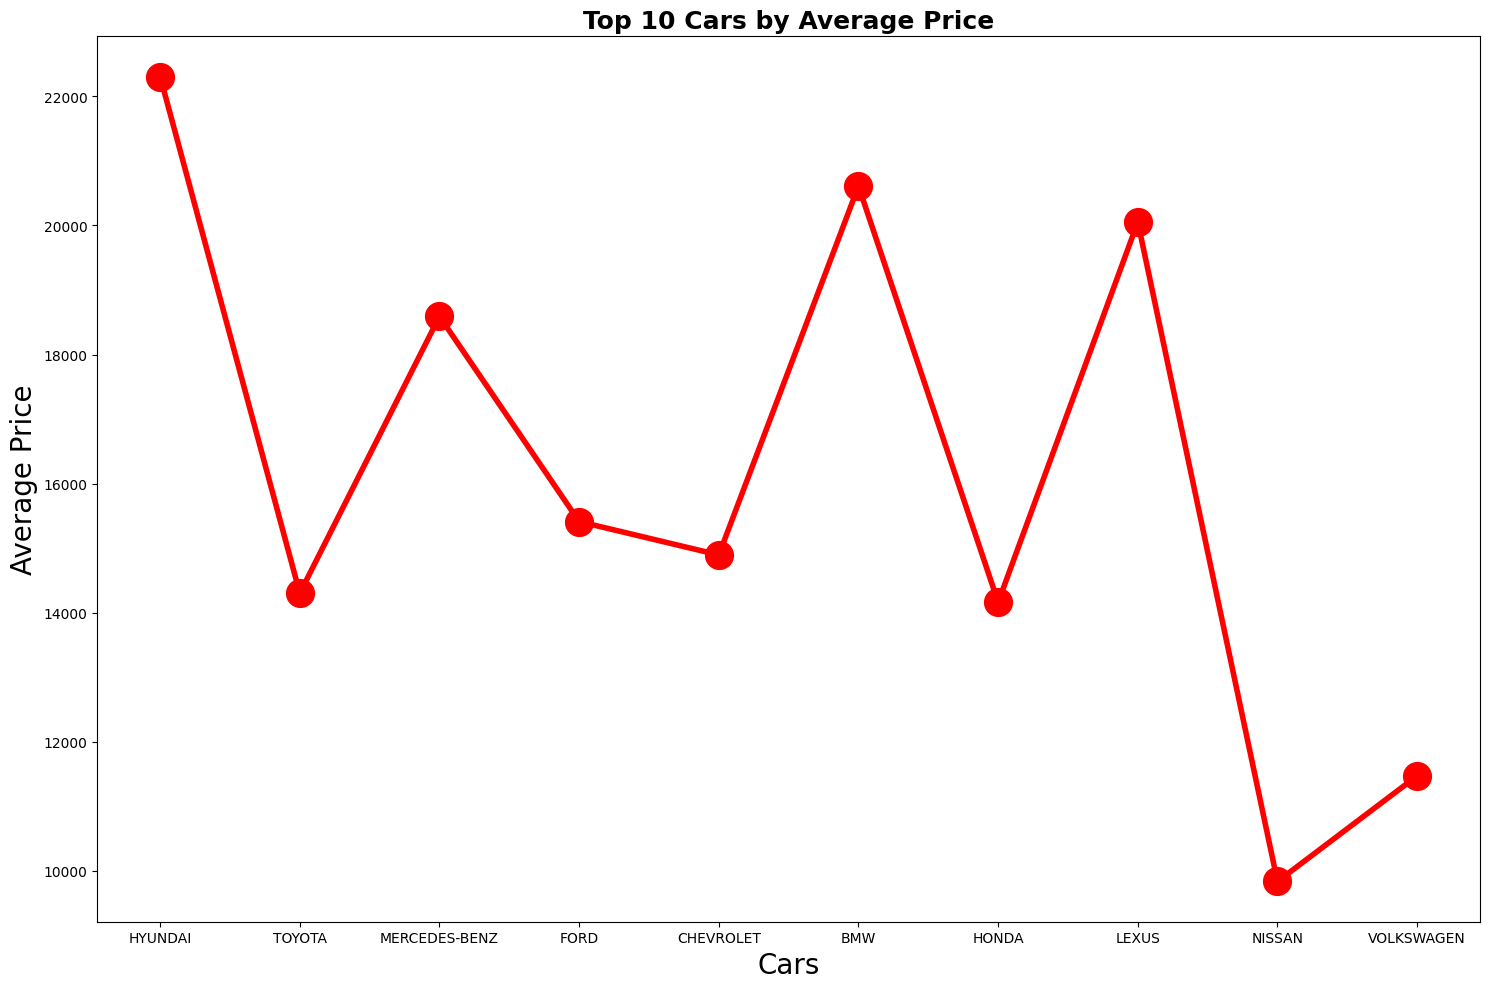

In [26]:
top_10_cars = df.Manufacturer.value_counts().sort_values(ascending=False)[:10]
# Calculate average price for top 10 cars
top_10_cars_means_prices = [df[df['Manufacturer']==i]['Price'].mean() for i in list(top_10_cars.index)]

plt.figure(figsize=(15,10))
plt.plot(top_10_cars.index,top_10_cars_means_prices,color='r',
         linewidth = 4,marker='o',markersize = 20)
plt.title('Top 10 Cars by Average Price',loc='center',fontweight='bold',fontsize=18)
plt.ylabel('Average Price',fontsize=20)
plt.xlabel('Cars',fontsize=20)
plt.tight_layout()
plt.show()


**Check if color effect car prices**

<Axes: xlabel='Price', ylabel='Levy'>

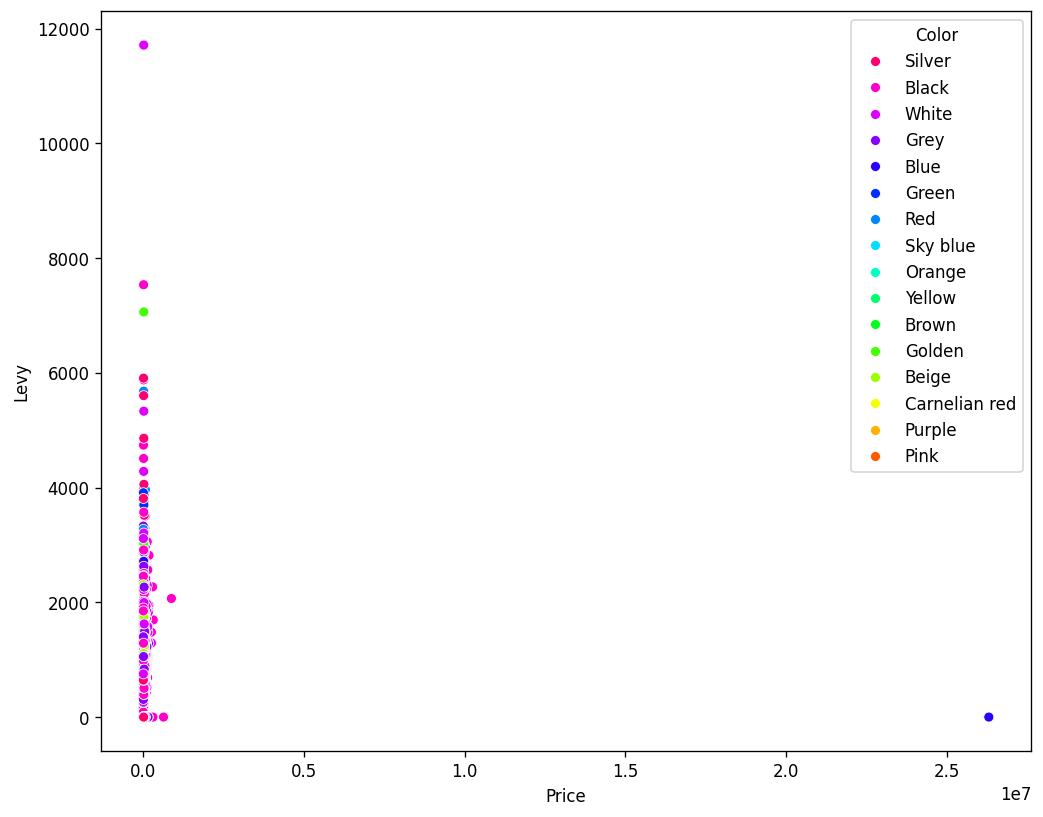

In [27]:
plt.figure(figsize=(10, 8), dpi=120)
sns.scatterplot(data=df, x='Price', y='Levy', hue="Color", palette="hsv_r")


# **Correlation Analysis**


In [28]:
# Correlation Analysis
cor= df.select_dtypes(exclude=object).corr()
cor


,Price,Levy,Engine volume,Mileage,Cylinders,Airbags,Age
Price,1.000000,-0.003558,0.008888,-0.001763,0.007435,-0.012709,-0.012689
Levy,-0.003558,1.000000,0.378117,-0.021203,0.251632,0.125015,-0.362827
Engine volume,0.008888,0.378117,1.000000,-0.006292,0.777228,0.221991,0.032427
Mileage,-0.001763,-0.021203,-0.006292,1.000000,-0.001720,-0.009174,0.064058
Cylinders,0.007435,0.251632,0.777228,-0.001720,1.000000,0.174112,0.099443
Airbags,-0.012709,0.125015,0.221991,-0.009174,0.174112,1.000000,-0.235160
Age,-0.012689,-0.362827,0.032427,0.064058,0.099443,-0.235160,1.000000


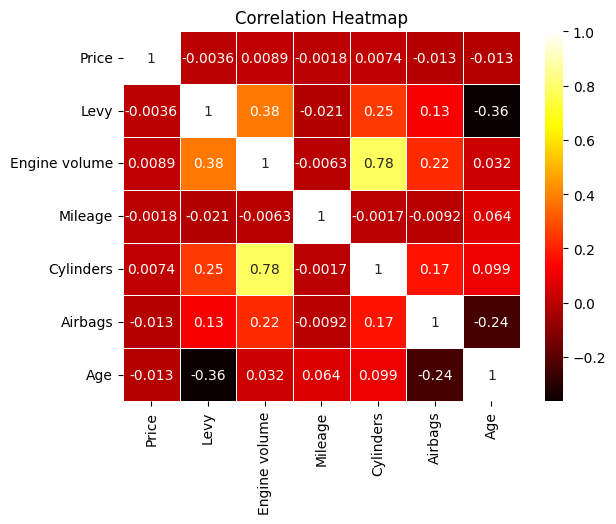

In [29]:
sns.heatmap(cor, annot= True, linewidths= 0.5,cmap='hot')
plt.title('Correlation Heatmap')
plt.show()

<Axes: >

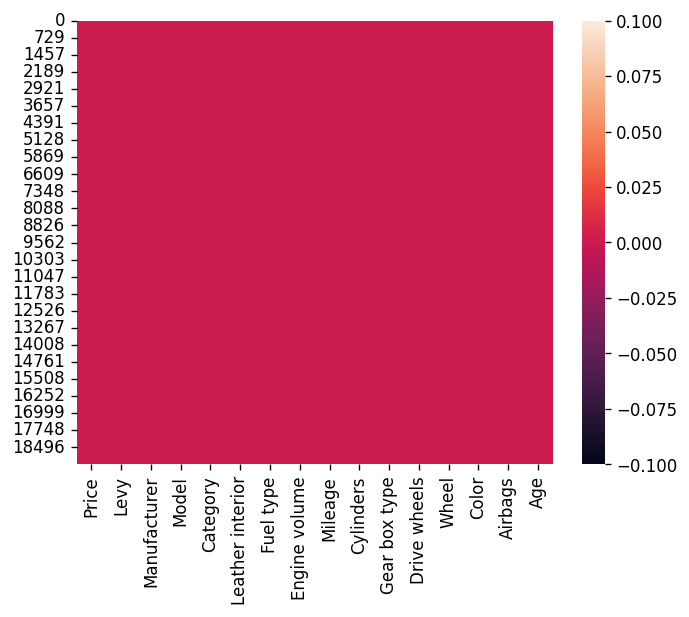

In [30]:
plt.figure(dpi=120)
sns.heatmap(df.isna())


#**Detect OutLier**

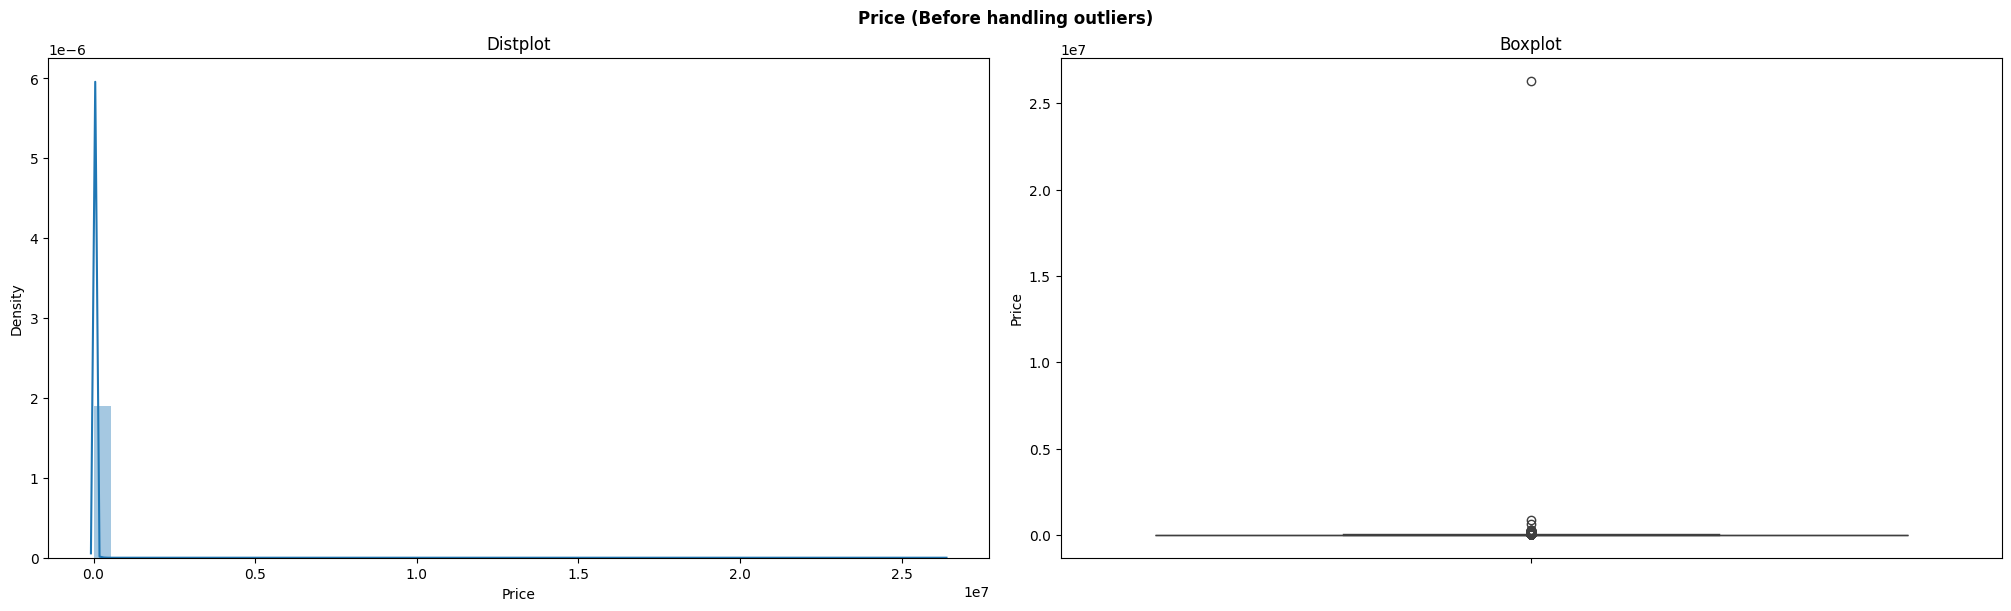

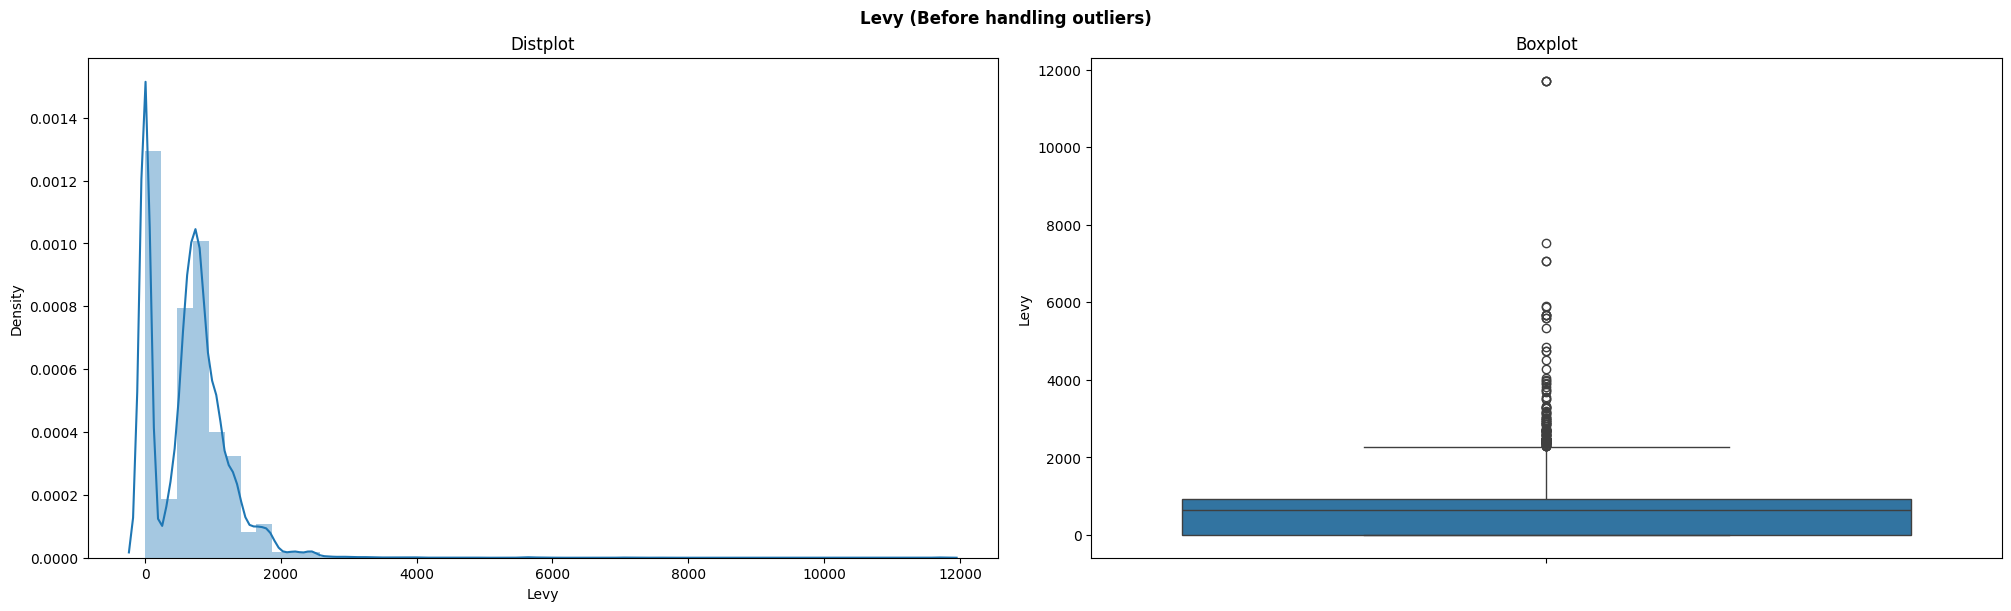

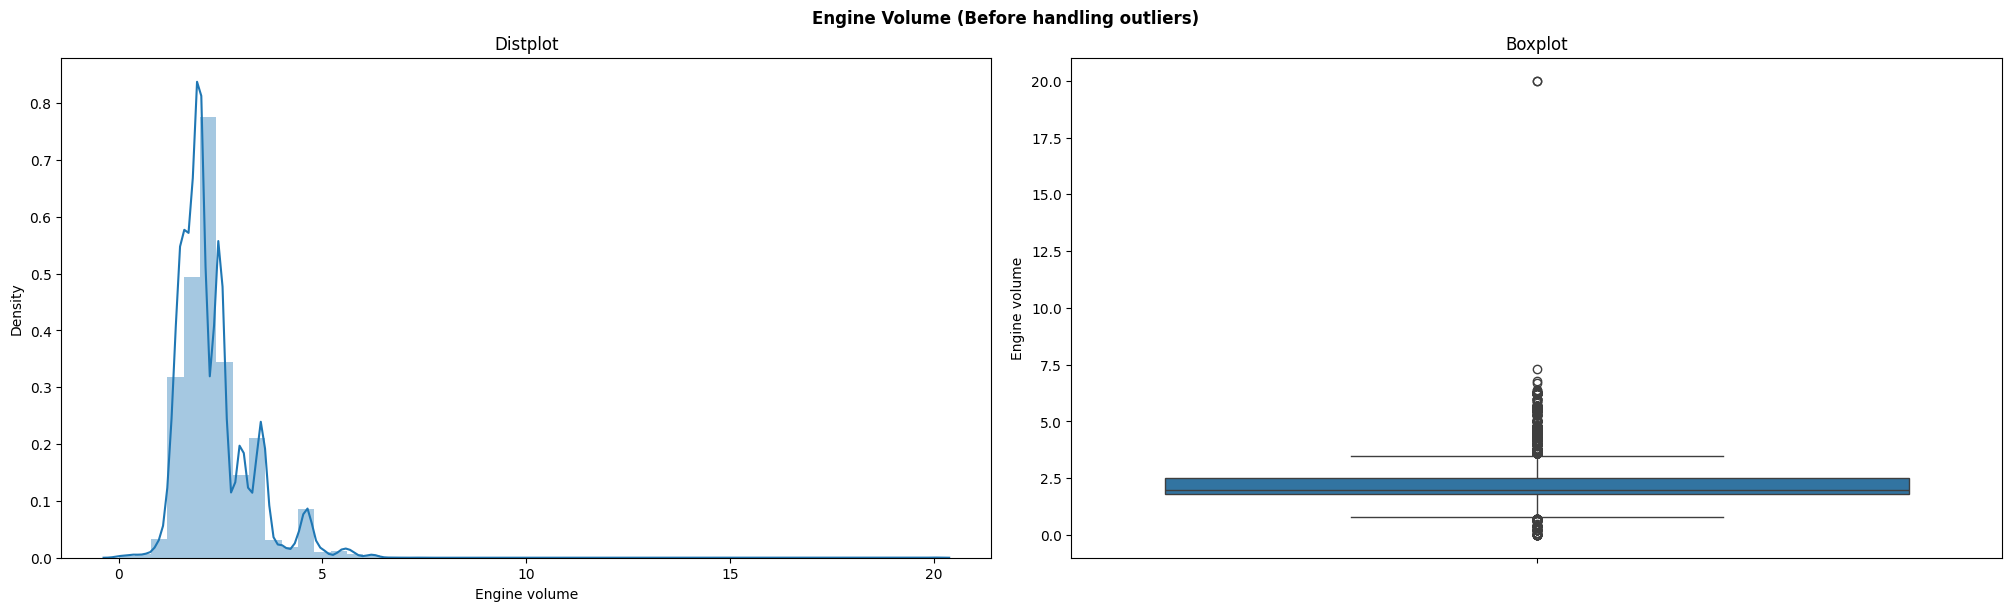

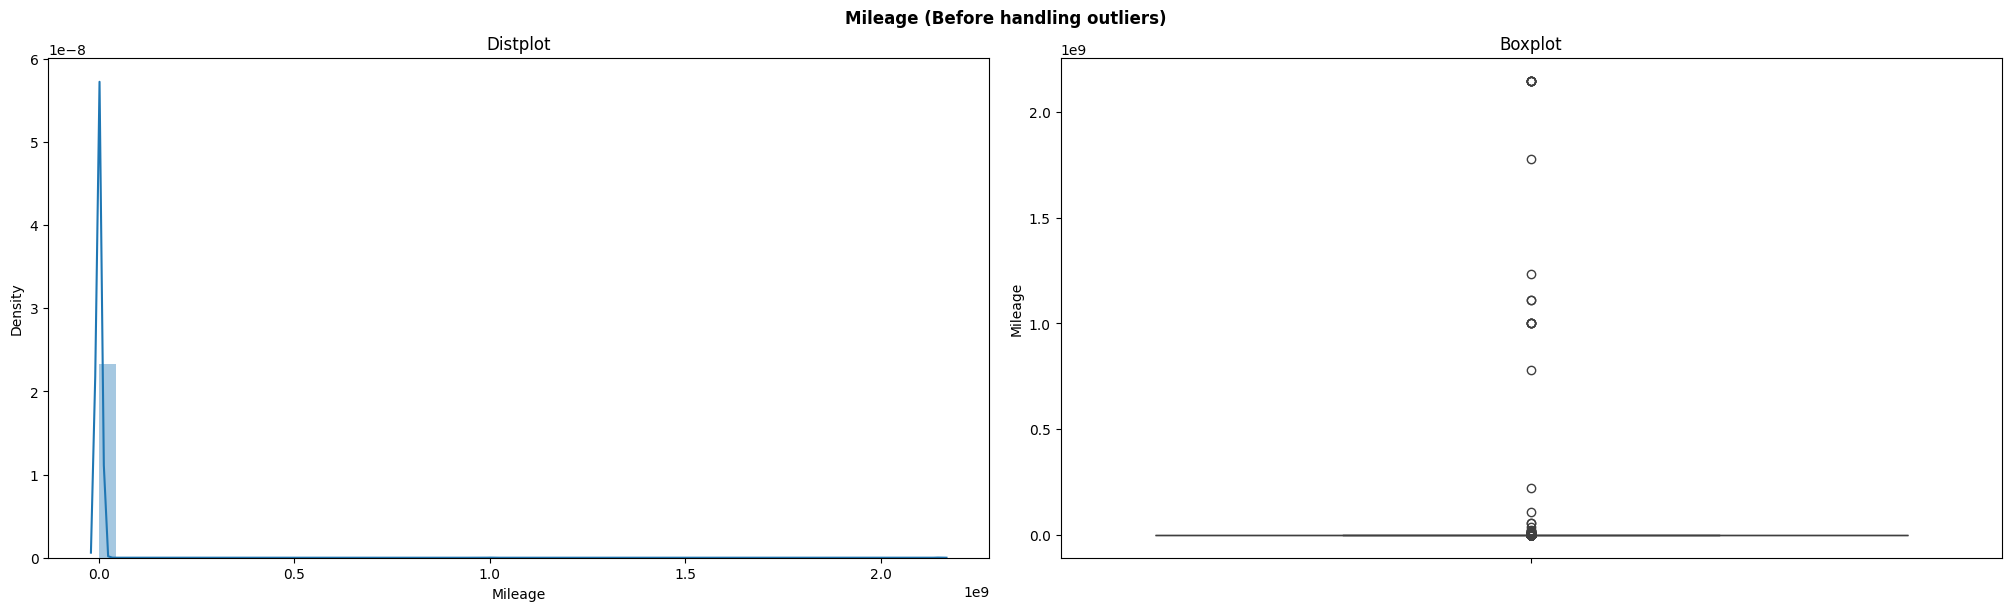

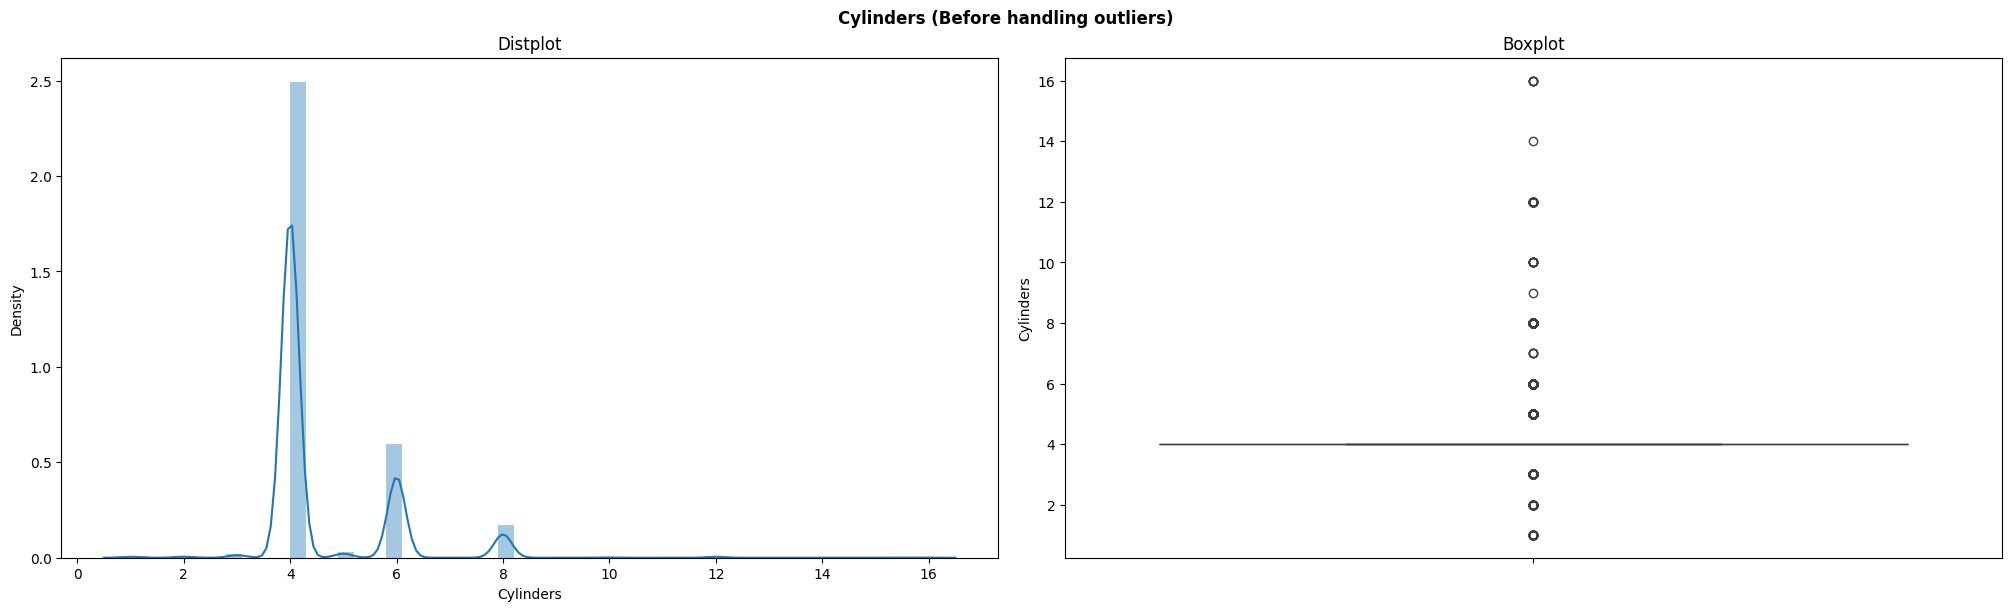

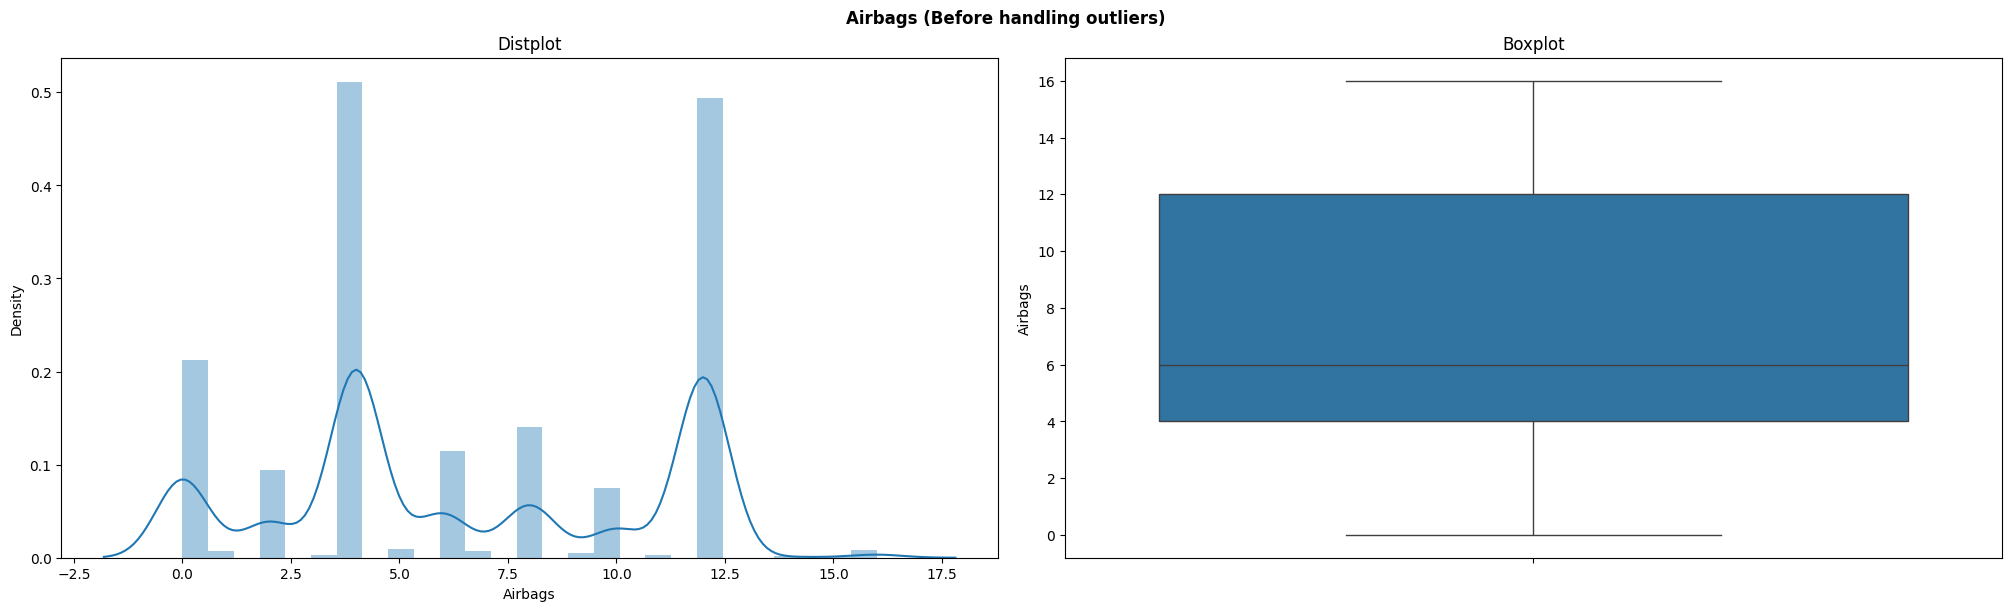

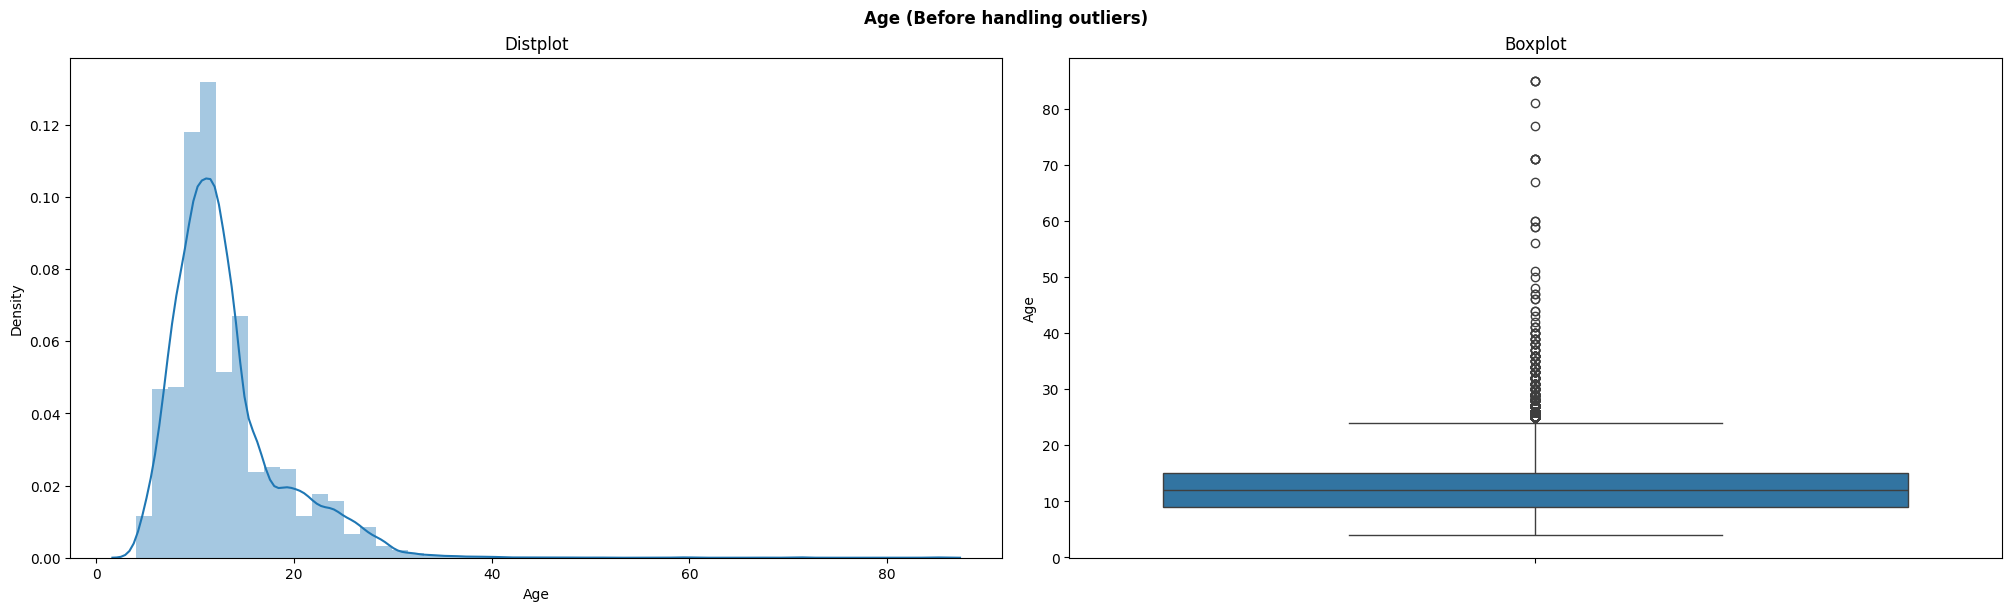

In [31]:
# Lets define the numeric columns
numeric_data = df.select_dtypes(exclude=object)
#Plotting Graphs Before treating outliers of continous features
for col in numeric_data:
    fig, ax =plt.subplots(1,2, constrained_layout=True)
    fig.set_size_inches(20, 6)
    sns.distplot(df[col], ax=ax[0]).set(title="Distplot")
    sns.boxplot(df[col], ax=ax[1]).set(title="Boxplot")
    plt.suptitle(f'{col.title()} (Before handling outliers)',weight='bold')
    fig.show()

In [32]:
for col in numeric_data:
    q1 = df[col].quantile(0.75)
    q2 = df[col].quantile(0.25)
    iq = q1 - q2

    low = q2-1.5*iq
    high = q1-1.5*iq
    outlier = ((numeric_data[col]>high) | (numeric_data[col]<low)).sum()

    total = numeric_data[col].shape[0]
    print(f"Total Outliers in {col} are :{outlier}---{round(100*(outlier)/total,2)}%")


if outlier>0:
    df = df.loc[(df[col]<=high) & (df[col]>=low) ]


Total Outliers in Price are :18924---100.0%
Total Outliers in Levy are :18924---100.0%
Total Outliers in Engine volume are :17625---93.14%
Total Outliers in Mileage are :17703---93.55%
Total Outliers in Cylinders are :4765---25.18%
Total Outliers in Airbags are :16540---87.4%
Total Outliers in Age are :18082---95.55%


## Transformation of Data

In [33]:
obdata = df.select_dtypes(include=object)
numdata = df.select_dtypes(exclude=object)
for i in range(0,obdata.shape[1]):
    obdata.iloc[:,i] = lab.fit_transform(obdata.iloc[:,i])
df = pd.concat([obdata,numdata],axis=1)
print(df)

      Manufacturer Model Category Leather interior Fuel type Gear box type  \
15              30    23        3                1         3             0   
36              30    24        3                0         3             2   
56              19    80        3                1         3             2   
59               4    53        7                0         3             0   
81              30   180        7                1         3             0   
...            ...   ...      ...              ...       ...           ...   
19155            9    75        5                0         1             0   
19157           13    20        7                1         3             0   
19180           10   149        7                1         2             0   
19182           30    30        7                1         1             0   
19196           10    61        7                1         3             0   

      Drive wheels Wheel Color  Price    Levy  Engine volume  M

## ***Preparing Data for Model***

In [34]:
x= df.drop('Price',axis=1)
y= df['Price']
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.25,random_state=5)

In [35]:
models = [LinearRegression(), Ridge(), Lasso(), ElasticNet(), DecisionTreeRegressor(), SVR(), RandomForestRegressor(), GradientBoostingRegressor(), AdaBoostRegressor()]

In [38]:
model_performance = []

# Train and evaluate each model
for model in models:
    # Train the model
    model.fit(x_train, y_train)

    # Make predictions on the test set
    y_pred = model.predict(x_test)

    # Calculate the performance metrics
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    model_performance.append((model, mse, r2, mae))
    # Print the model name and the performance metrics
    print(f"Model: {model.__class__.__name__}")
    print(f"MSE: {mse}")
    print(f"R2: {r2}")
    print(f"MAE: {mae}")
    print("-" * 50)


# Determine the best model based on lowest MSE
best_model, best_mse, best_r2, best_mae = min(model_performance, key=lambda x: x[1])

# Print the best model based on MSE
print(f"Best model based on MSE: {best_model.__class__.__name__} with MSE: {best_mse}")

# Save the best model to a file
with open(f'{best_model.__class__.__name__}.pkl', 'wb') as file:
    pickle.dump(best_model, file)


Model: LinearRegression
MSE: 661418844.6886808
R2: 0.48162737395538113
MAE: 18417.97233817115
--------------------------------------------------
Model: Ridge
MSE: 657484288.7770207
R2: 0.48471099652922334
MAE: 18358.413840336132
--------------------------------------------------
Model: Lasso
MSE: 661288126.131256
R2: 0.48172982178012824
MAE: 18415.509985490233
--------------------------------------------------
Model: ElasticNet
MSE: 555315979.8044906
R2: 0.5647831853486339
MAE: 15287.661289703567
--------------------------------------------------
Model: DecisionTreeRegressor
MSE: 2905488051.413507
R2: -1.2771130324558433
MAE: 19022.755924170615
--------------------------------------------------
Model: SVR
MSE: 1354692730.5482206
R2: -0.061710947392748405
MAE: 24796.718912352088
--------------------------------------------------
Model: RandomForestRegressor
MSE: 438309806.6073382
R2: 0.656484227359597
MAE: 10996.08891897991
--------------------------------------------------
Model: Gradi

In [37]:
# Define K-Fold cross-validation
kf = KFold(n_splits=10, shuffle=True, random_state=42)

# Function to perform cross-validation and calculate mean of scores
def evaluate_model(model, X, y, scoring):
    scores = cross_val_score(model, X, y, cv=kf, scoring=scoring)
    return scores.mean()

model_performance = []

# Train and evaluate each model using cross-validation
for model in models:
    mse = evaluate_model(model, x_train, y_train, make_scorer(mean_squared_error, greater_is_better=False))
    r2 = evaluate_model(model, x_train, y_train, make_scorer(r2_score))
    mae = evaluate_model(model, x_train, y_train, make_scorer(mean_absolute_error, greater_is_better=False))
    model_performance.append((model.__class__.__name__, -mse, r2, -mae))  # Negate MSE and MAE to align with 'higher is better'

    # Print the model name and the averaged performance metrics
    print(f"Model: {model.__class__.__name__}")
    print(f"Average MSE: {-mse}")  # Negate back for displaying
    print(f"Average R2: {r2}")
    print(f"Average MAE: {-mae}")  # Negate back for displaying
    print("-" * 50)

# Determine the best model based on averaged scores
best_mse = min(model_performance, key=lambda x: x[1])
best_r2 = max(model_performance, key=lambda x: x[2])
best_mae = min(model_performance, key=lambda x: x[3])

# Print the best models based on cross-validated scores
print(f"Best model based on Average MSE: {best_mse[0]} with MSE: {best_mse[1]}")
print(f"Best model based on Average R2: {best_r2[0]} with R2: {best_r2[2]}")
print(f"Best model based on Average MAE: {best_mae[0]} with MAE: {best_mae[3]}")


Model: LinearRegression
Average MSE: 1921908345.920697
Average R2: 0.33583733232018387
Average MAE: 21131.956222145585
--------------------------------------------------
Model: Ridge
Average MSE: 1919940752.2907028
Average R2: 0.3384754742256497
Average MAE: 21085.331268935428
--------------------------------------------------
Model: Lasso
Average MSE: 1921804501.1386127
Average R2: 0.33593614500423763
Average MAE: 21130.298259425203
--------------------------------------------------
Model: ElasticNet
Average MSE: 2077825243.6290689
Average R2: 0.3735446296542001
Average MAE: 20458.21033212379
--------------------------------------------------
Model: DecisionTreeRegressor
Average MSE: 2561499046.959104
Average R2: -0.553034787913494
Average MAE: 16659.538591269844
--------------------------------------------------
Model: SVR
Average MSE: 3169664907.044296
Average R2: -0.08512852201968088
Average MAE: 29051.60676143064
--------------------------------------------------
Model: RandomFore

1.2.2
